In [1]:
import numpy as np
import matplotlib.pyplot as plt

class KalmanFilterClass():
    def __init__(self, dt, acceleration, sd_acceleration , sd_measurement):
        
        self.dt = dt
        
        # The acceleration which is essentially u from the state update equation 
        self.a =  acceleration
        
        # The standard deviation of the acceleration variable in order get t
        self.sd_a = sd_acceleration
        
        # The state transition matrix 
        self.A = np.matrix([ [1 , self.dt],
                             [0 ,   1    ]] )
        
        
        # The control input transition matrix 
        self.B = np.matrix([ [(self.dt**2)/2],
                             [    self.dt   ]]) 
        
        # The matrix that maps x to measurement 
        self.H = np.matrix( [[1,0]] )
        
        
        
        # Processs Covariance that for our case depends solely on the acceleration 
        self.Q = np.matrix([[(self.dt**4)/4, (self.dt**3)/2],
                            [(self.dt**3)/2, self.dt**2]]) * self.sd_a**2
        
        
        # Measurement Covariance. It's a scalar in this case because only position is measured
        self.R = sd_measurement**2
        
        # The error covariance matrix that is Identity for now. It's get updated based on Q, A and R.
        self.P = np.eye(self.A.shape[1])
        
        
        # Finally the vector in consideration it's [ position ; velocity ]
        self.x = np.matrix([[0],[0]])
        
    def predict(self):
        
        # The state update : X_t = A*X_t-1 + B*u 
        # here u is acceleration,a 
        self.x = np.dot(self.A, self.x) + np.dot(self.B, self.a)
        
        # Updation of the error covariance matrix 
        self.P = np.dot(np.dot(self.A, self.P), self.A.T) + self.Q
        
        return self.x
    
    def update(self, z):
        
        S = np.dot(self.H, np.dot(self.P, self.H.T)) + self.R
        
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))  
        
        self.x = np.round(self.x + np.dot(K, (z - np.dot(self.H, self.x))))  
        
        I = np.eye(self.H.shape[1])
        
        self.P = (I - (K * self.H)) * self.P 

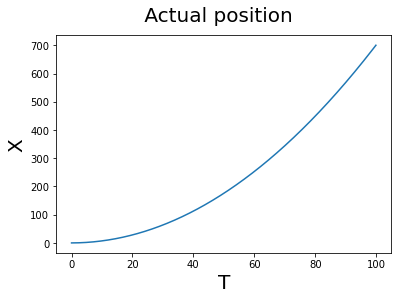

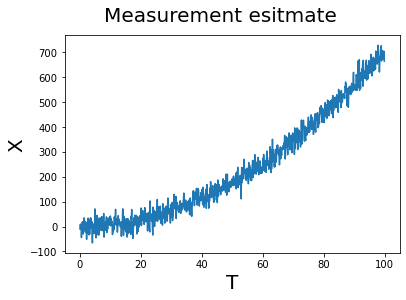

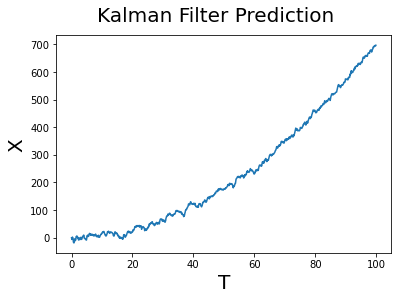

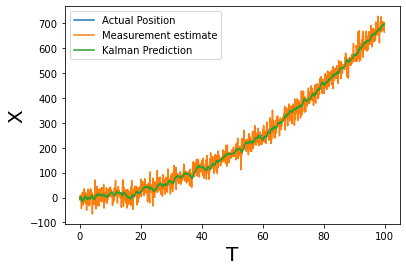

In [8]:
def main():
    dt = 0.10
    
    t =np.arange(0, 100, dt)
    
    # create Waypoints 
    waypoints = 0.01*(2*t + 7*t**2)
    
    # acceleration is set to 0.3 m/s^2
    a= 0.3
    
    # we assume that the standard deviation of the acceleration is 0.5 (m/s^2)
    sd_a = 0.5   
    
    # and standard deviation of the measurement is 0.75 (m)
    sd_m = 0.75
    
    # create KalmanFilter object
    
    kf = KalmanFilterClass(dt, a, sd_a, sd_m)
    
    prediction_points = []
    
    measurement_points = []
    
    for x in waypoints:
        
        # Mesurement is given as waypoint + normal error in the range(0,50)
        z = kf.H * x + np.random.normal(0, 25)
        
        # Append measurements
        measurement_points.append(z.item(0))
        
        # Call predict() to predict the next state and append the output
        prediction_points.append(kf.predict()[0])
        
        # Update to take in the measurement to update the parameters
        kf.update(z.item(0))
        
    fig = plt.figure()
    fig.suptitle(' Actual position ', fontsize=20)
    
    plt.plot(t, np.array(waypoints), label='Acutal Position')
    plt.xlabel('T', fontsize=20)
    plt.ylabel('X', fontsize=20)
    plt.show()
    fig = plt.figure()
    fig.suptitle('Measurement esitmate  ', fontsize=20)
    plt.plot(t, measurement_points, label='Measurement estimate')
    plt.xlabel('T', fontsize=20)
    plt.ylabel('X', fontsize=20)
    plt.show()
    
    fig = plt.figure()
    fig.suptitle('Kalman Filter Prediction ', fontsize=20)
    plt.plot(t, np.squeeze(prediction_points), label='Kalman Prediction ')
    plt.xlabel('T', fontsize=20)
    plt.ylabel('X', fontsize=20)
    plt.show()
    
    fig = plt.figure()
    fig.suptitle('', fontsize=20)
    plt.plot(t, np.array(waypoints), label='Actual Position')
    plt.plot(t, measurement_points, label='Measurement estimate')
    plt.plot(t, np.squeeze(prediction_points), label='Kalman Prediction ')
    plt.xlabel('T', fontsize=20)
    plt.ylabel('X', fontsize=20)
    plt.legend()
    plt.show()
    
    
if __name__ == "__main__":
    main()
    
    